In [1]:
import pandas as pd
import pyreadstat as st
import numpy as np


path = r"C:\Users\HP\OneDrive\Escritorio\David Guzzi\DiTella\MEC\Materias\2024 3T\[MT05] Econometría\Guías prácticas\Clase 5\Clase 5 - Stata-20241105\caschool.dta"

df, meta = st.read_dta(path)
df.head()

,observat,dist_cod,county,condado,district,gr_span,enrl_tot,teachers,calw_pct,meal_pct,...,avginc,el_pct,read_scr,math_scr,test_scr,read_pos,math_pos,test_pos,test_scr_2,str_2
0,1.0,75119.0,Alameda,1,Sunol Glen Unified,KK-08,195.0,10.900000,0.510200,2.040800,...,22.690001,0.000000,691.599976,690.000000,690.799988,1.0,1.0,1.0,22.792118,-1.302281
1,94.0,61382.0,Butte,2,Bangor Union Elementary,KK-08,146.0,8.000000,25.342501,54.109600,...,7.105000,0.000000,646.099976,629.799988,637.949951,0.0,0.0,0.0,-0.780721,-1.889613
2,5.0,61523.0,Butte,2,Palermo Union Elementary,KK-08,1335.0,71.500000,33.108601,78.427002,...,9.080333,13.857677,641.799988,639.900024,640.849976,0.0,0.0,0.0,-1.591458,-1.348202
3,4.0,61457.0,Butte,2,Golden Feather Union Elementary,KK-08,243.0,14.000000,36.475399,77.049202,...,8.978000,0.000000,651.900024,643.500000,647.700012,0.0,0.0,0.0,5.450817,-2.668609
4,3.0,61549.0,Butte,2,Thermalito Union Elementary,KK-08,1550.0,82.900002,55.032299,76.322601,...,8.978000,30.000002,636.299988,650.900024,643.599976,0.0,0.0,0.0,1.350780,-1.328527


In [2]:
import statsmodels.api as sm

# Definir la variable dependiente (Y) y la independiente (X)
Y = df["test_scr"]
X = df["str"]

# Agregar una constante para el intercepto
X = sm.add_constant(X)

# Ajustar el modelo de regresión
model = sm.OLS(Y, X).fit()

# Mostrar el resumen de la regresión
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:               test_scr   R-squared:                       0.051
Model:                            OLS   Adj. R-squared:                  0.049
Method:                 Least Squares   F-statistic:                     22.58
Date:                Mon, 06 Jan 2025   Prob (F-statistic):           2.78e-06
Time:                        16:36:54   Log-Likelihood:                -1822.2
No. Observations:                 420   AIC:                             3648.
Df Residuals:                     418   BIC:                             3657.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        698.9330      9.467     73.825      0.0

In [3]:
# Obtener los coeficientes del modelo como una matriz
coef1 = model.params.to_numpy()
coef1

array([698.93295233,  -2.27980829])

In [4]:
# Obtener la matriz de varianzas-covarianzas de los coeficientes
varcov1 = model.cov_params().to_numpy()
varcov1

array([[89.63339425, -4.52186567],
       [-4.52186567,  0.23023257]])

In [5]:
import statsmodels.api as sm

# Definir la variable dependiente (Y) y la independiente (X)
Y = df["test_scr"]
X = df["str"]

# Agregar una constante para el intercepto
X = sm.add_constant(X)

# Ajustar el modelo de regresión
model = sm.OLS(Y, X).fit()

# Obtener el nivel de confianza deseado (90%)
confidence_level = 0.90

# Calcular intervalos de confianza
conf_int = model.conf_int(alpha=1 - confidence_level)

# Mostrar el resumen de la regresión con los intervalos ajustados
print(model.summary())

# Mostrar los intervalos de confianza al 90%
print(f"Intervalos de confianza al {int(confidence_level * 100)}%:")
print(conf_int)

                            OLS Regression Results                            
Dep. Variable:               test_scr   R-squared:                       0.051
Model:                            OLS   Adj. R-squared:                  0.049
Method:                 Least Squares   F-statistic:                     22.58
Date:                Mon, 06 Jan 2025   Prob (F-statistic):           2.78e-06
Time:                        16:36:54   Log-Likelihood:                -1822.2
No. Observations:                 420   AIC:                             3648.
Df Residuals:                     418   BIC:                             3657.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        698.9330      9.467     73.825      0.0

In [6]:
import statsmodels.api as sm

# Definir la variable dependiente (Y) y la independiente (X)
Y = df["test_scr"]
X = df["str"]

# Agregar una constante para el intercepto
X = sm.add_constant(X)

# Ajustar el modelo de regresión con errores estándar robustos
model = sm.OLS(Y, X).fit(cov_type='HC0')

# Mostrar el resumen del modelo con errores estándar robustos
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:               test_scr   R-squared:                       0.051
Model:                            OLS   Adj. R-squared:                  0.049
Method:                 Least Squares   F-statistic:                     19.35
Date:                Mon, 06 Jan 2025   Prob (F-statistic):           1.38e-05
Time:                        16:36:54   Log-Likelihood:                -1822.2
No. Observations:                 420   AIC:                             3648.
Df Residuals:                     418   BIC:                             3657.
Df Model:                           1                                         
Covariance Type:                  HC0                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        698.9330     10.340     67.597      0.0

In [7]:
import numpy as np
import pandas as pd

# Establecer el número de observaciones y la semilla
n_obs = 30
seed = 10101
np.random.seed(seed)

# Generar una columna de números aleatorios uniformes
x = np.random.uniform(0, 1, n_obs)

# Crear un DataFrame para replicar el formato de los datos en Stata
df = pd.DataFrame({'x': x})

# Mostrar el DataFrame
print(df)

           x
0   0.859322
1   0.116708
2   0.252243
3   0.220286
4   0.268094
5   0.057571
6   0.446554
7   0.047663
8   0.295114
9   0.372498
10  0.835449
11  0.002595
12  0.154359
13  0.736436
14  0.163167
15  0.159443
16  0.624258
17  0.418396
18  0.374854
19  0.872416
20  0.761293
21  0.979250
22  0.896862
23  0.634386
24  0.041460
25  0.184940
26  0.577059
27  0.994558
28  0.487599
29  0.755669


In [8]:
df.describe()

,x
count,30.000000
mean,0.453017
std,0.316496
min,0.002595
25%,0.168610
50%,0.396625
75%,0.750861
max,0.994558


               xbar
count  10000.000000
mean       0.501024
std        0.053219
min        0.293775
25%        0.465360
50%        0.500430
75%        0.538081
max        0.696722


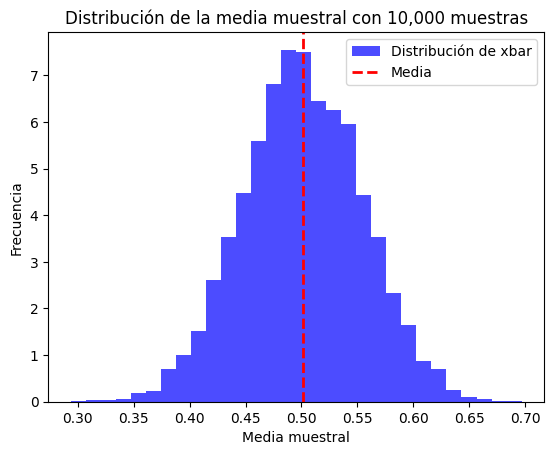

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Función para generar una muestra y calcular la media
def una_muestra(n_obs=30, seed=None):
    if seed is not None:
        np.random.seed(seed)
    # Generar datos aleatorios uniformes
    x = np.random.uniform(0, 1, n_obs)
    return np.mean(x)

# Simular 10,000 medias muestrales
def simular_medias(reps=10000, n_obs=30, seed=None):
    np.random.seed(seed)  # Fijar semilla global
    medias = [una_muestra(n_obs=n_obs) for _ in range(reps)]
    return np.array(medias)

# Parámetros
n_obs = 30
reps = 10000
seed = 10101

# Correr simulación
medias_muestrales = simular_medias(reps=reps, n_obs=n_obs, seed=seed)

# Resumen de las 10,000 medias muestrales
resumen = pd.DataFrame(medias_muestrales, columns=["xbar"]).describe()
print(resumen)

# Graficar histograma de las medias muestrales
plt.hist(medias_muestrales, bins=30, density=True, alpha=0.7, color='blue', label="Distribución de xbar")
plt.title("Distribución de la media muestral con 10,000 muestras")
plt.xlabel("Media muestral")
plt.ylabel("Frecuencia")
plt.axvline(np.mean(medias_muestrales), color='red', linestyle='dashed', linewidth=2, label="Media")
plt.legend()
plt.show()

In [10]:
import numpy as np
import pandas as pd

# Configuración de la simulación
n_obs = 30
reps = 10000
seed = 10101

# Fijar la semilla para reproducibilidad
np.random.seed(seed)

# Lista para almacenar las medias muestrales
results = []

# Simulación
for _ in range(reps):
    # Generar una muestra aleatoria de tamaño n_obs
    sample = np.random.uniform(0, 1, n_obs)
    # Calcular la media muestral y almacenar
    results.append(np.mean(sample))

# Crear un DataFrame con los resultados
df_results = pd.DataFrame(results, columns=["xmean"])

# # Guardar los resultados en un archivo CSV
# output_file = "simresults.csv"
# df_results.to_csv(output_file, index=False)

# # Leer los resultados desde el archivo (similar a `use simresults, clear`)
# df_loaded = pd.read_csv(output_file)

# # Resumen estadístico de los resultados cargados
# print(df_loaded.describe())
print(df_results.describe())

              xmean
count  10000.000000
mean       0.501024
std        0.053219
min        0.293775
25%        0.465360
50%        0.500430
75%        0.538081
max        0.696722


              hat
count  200.000000
mean     2.032801
std      0.688572
min      0.049868
25%      1.585882
50%      2.022578
75%      2.471362
max      3.795985


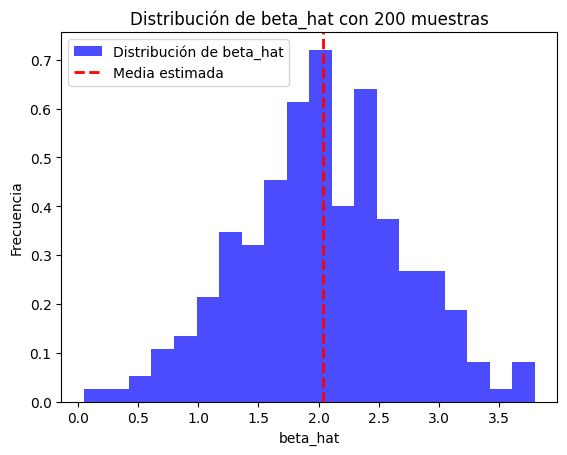

In [11]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Parámetros poblacionales
beta = 2  # Coeficiente de pendiente
a = 1     # Ordenada al origen

# Función para generar una muestra y estimar beta
def una_muestra(n_obs=30, seed=None):
    if seed is not None:
        np.random.seed(seed)
    # Generar variables aleatorias
    x = np.random.uniform(0, 1, n_obs)  # Variable independiente
    u = np.random.normal(0, 1, n_obs)  # Error aleatorio
    y = a + beta * x + u               # Variable dependiente
    
    # Ajustar modelo de regresión lineal
    x_with_const = sm.add_constant(x)  # Agregar constante
    model = sm.OLS(y, x_with_const).fit()  # Ajustar modelo OLS
    
    # Retornar el coeficiente estimado para x
    return model.params[1]  # Coeficiente asociado a x

# Simular 200 repeticiones de beta_hat
def simular_beta_hat(reps=200, n_obs=30, seed=10101):
    np.random.seed(seed)  # Fijar semilla global
    betas_hat = [una_muestra(n_obs=n_obs) for _ in range(reps)]
    return np.array(betas_hat)

# Parámetros de simulación
n_obs = 30
reps = 200
seed = 10101

# Realizar simulación
betas_hat = simular_beta_hat(reps=reps, n_obs=n_obs, seed=seed)

# Resumen estadístico
resumen = pd.DataFrame(betas_hat, columns=["hat"]).describe()
print(resumen)

# Graficar histograma de beta_hat
plt.hist(betas_hat, bins=20, density=True, alpha=0.7, color='blue', label="Distribución de beta_hat")
plt.axvline(np.mean(betas_hat), color='red', linestyle='dashed', linewidth=2, label="Media estimada")
plt.title("Distribución de beta_hat con 200 muestras")
plt.xlabel("beta_hat")
plt.ylabel("Frecuencia")
plt.legend()
plt.show()
